In [1]:
import numpy as np
import pandas as pd
import random
import math
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [2]:
%%time
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/1668924906_3531766_test-data-images.txt",header=None,sep=",")

CPU times: user 913 ms, sys: 128 ms, total: 1.04 s
Wall time: 3.38 s


In [7]:
%%time
def euclidean_dist(i,c):
  x=np.sum((i-c)**2)
  return np.sqrt(x)

def generate_clusters(input,centroids):
  found_centroid=[]
  for i in input:
    cal_distance=[euclidean_dist(i,c) for c in centroids]
    found_centroid.append(np.argmin(cal_distance))
  return found_centroid

def update_centroid(test,groups):
  test=pd.DataFrame(test)
  test['cluster']=groups
  new_values=[]
  unique=set(test['cluster'])
  for i in unique:
    cluster_i=test[test['cluster']==i][test.columns[:-1]]
    median=np.median(cluster_i,axis=0)
    new_values.append(median)
  return test,new_values

def check_centroid(cen,updated_cen):
  np_cen=np.array(cen)
  np_updated_cen=np.array(updated_cen)
  return euclidean_dist(np_cen,np_updated_cen)

def kmeans(test_np,k,iterations):
  np.random.seed(42)
  centroids=[]
  centroids=[test_np[i] for i in np.random.choice(range(0,len(test_np)),k)]
  print("Initial centroids:",centroids,end='\n\n')
  np.array(centroids)
  for i in range(iterations):
    clusters_values=generate_clusters(test_np,centroids)
    updated_test,updated_centres=update_centroid(test_np,clusters_values)
    if check_centroid(centroids,updated_centres)==0:
      print(i)
      break
    else:
      centroids=updated_centres
  return updated_test,centroids

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 15.3 µs


In [4]:
%%time
svd=TruncatedSVD(n_components=50,random_state=42)
transformed_test=svd.fit_transform(test)

CPU times: user 1.84 s, sys: 813 ms, total: 2.65 s
Wall time: 3.01 s


In [5]:
%%time
tsne=TSNE(n_components=2,n_iter=1000,n_jobs=-1,random_state=42)
test_tsne=tsne.fit_transform(transformed_test)
test_tsne

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 3min 29s, sys: 1.45 s, total: 3min 31s
Wall time: 1min 52s


array([[-29.486307,  62.539776],
       [-47.75286 , -41.122913],
       [-52.50872 , -61.413116],
       ...,
       [ 45.431103, -18.286728],
       [ 36.600044,  52.55174 ],
       [  8.02104 ,  70.30042 ]], dtype=float32)

In [6]:
%%time
count=np.arange(2,21,2)
list_of_errors=[]
for i in count:
  df,centroids=kmeans(test_tsne,i,100)
  total_error=0
  x=len(centroids)
  for k in range(x):
    error=0
    current=df[df['cluster']==k][df.columns[:-1]]
    for line,i in current.iterrows():
      error=error+np.round(euclidean_dist(centroids[k],i))
      total_error+=error
  list_of_errors.append(total_error)

Initial centroids: [array([42.135307, 14.118372], dtype=float32), array([60.21197 , 19.784096], dtype=float32)]

Initial centroids: [array([42.135307, 14.118372], dtype=float32), array([60.21197 , 19.784096], dtype=float32), array([ 31.988607, -31.058563], dtype=float32), array([  5.2912354, -19.78587  ], dtype=float32)]

Initial centroids: [array([42.135307, 14.118372], dtype=float32), array([60.21197 , 19.784096], dtype=float32), array([ 31.988607, -31.058563], dtype=float32), array([  5.2912354, -19.78587  ], dtype=float32), array([38.198566, 20.780445], dtype=float32), array([-6.3414783, 61.03104  ], dtype=float32)]

Initial centroids: [array([42.135307, 14.118372], dtype=float32), array([60.21197 , 19.784096], dtype=float32), array([ 31.988607, -31.058563], dtype=float32), array([  5.2912354, -19.78587  ], dtype=float32), array([38.198566, 20.780445], dtype=float32), array([-6.3414783, 61.03104  ], dtype=float32), array([-14.423332,  48.33274 ], dtype=float32), array([-61.873207, 

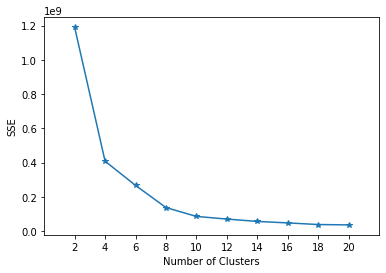

CPU times: user 158 ms, sys: 5.99 ms, total: 164 ms
Wall time: 188 ms


In [8]:
%%time
plt.figure()
plt.xlim(0,22)
steps = [2,4,6,8,10,12,14,16,18,20]
plt.plot(count,list_of_errors,marker='*')
plt.xticks(count,steps)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [8]:
%%time
df,centroids=kmeans(test_tsne,10,100)
clusters=df['cluster']+1

file=open("/content/drive/MyDrive/Colab Notebooks/output_imgmediantsne.txt",'w')
for i in clusters:
  file.write(str(i))
  file.write("\n")
file.close()
print("values copied into text file")

Initial centroids: [array([42.135307, 14.118372], dtype=float32), array([60.21197 , 19.784096], dtype=float32), array([ 31.988607, -31.058563], dtype=float32), array([  5.2912354, -19.78587  ], dtype=float32), array([38.198566, 20.780445], dtype=float32), array([-6.3414783, 61.03104  ], dtype=float32), array([-14.423332,  48.33274 ], dtype=float32), array([-61.873207,  22.893011], dtype=float32), array([-50.172226, -60.21144 ], dtype=float32), array([-40.039677,  13.25647 ], dtype=float32)]

21
values copied into text file
CPU times: user 31 s, sys: 1.62 s, total: 32.6 s
Wall time: 30.1 s
